In [15]:
import numpy as np
import pandas as pd

from collections import Counter

from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [2]:
log_features = ['Fs', 'Fm', 'Fh', 'Fb', 
                'rgeo', 'b_rgeo', 'B_rgeo',
                'PM'
               ]

features = ['Fs', 'Fm', 'Fh', 'Fb',
            'P_intra', 'P_inter',
            'Gmag', 'BPmag', 'RPmag', 'Jmag', 'Hmag', 'Kmag',
            'W1mag', 'W2mag', 'W3mag',
            'Plx', 'PM',
            'rgeo', 'b_rgeo', 'B_rgeo'
           ]

errors = ['e_Fs', 'e_Fm', 'e_Fh', 'e_Fb',
          'e_Gmag', 'e_BPmag', 'e_RPmag', 'e_Jmag', 'e_Hmag', 'e_Kmag',
          'e_W1mag', 'e_W2mag', 'e_W3mag', 
          'e_Plx']

In [3]:
df = pd.read_csv('TD.csv')
df[log_features] = df[log_features].apply(np.log10)
df

,CSCv2_name,CSCv2_RA,CSCv2_DEC,CSCv2_PU,CSCv2_S/N,Fs,e_Fs,Fm,e_Fm,Fh,...,e_P_NS,e_P_YSO,Class,Class_prob,e_Class_prob,CT,CSCv2_flags,Catalog_name,True_Class,Class_ref
0,2CXO J000009.3+135618,0.039115,13.938493,0.79,1.95,-14.698970,1.000000e-15,-15.301030,5.000000e-16,-14.698970,...,0.0040,0.0500,AGN,0.900,0.100,5.307,NaN,SDSS J00001+1356,AGN,2010A&A...518A..10V
1,2CXO J000230.7+004959,0.627974,0.833072,0.72,11.07,-13.244125,7.000000e-15,-13.537602,5.000000e-15,-13.221849,...,0.0003,0.0004,AGN,0.999,0.004,145.799,NaN,PB 5698,AGN,2010A&A...518A..10V
2,2CXO J000622.6-000424,1.594324,-0.073573,0.78,25.42,-12.823909,1.000000e-14,-12.931814,8.000000e-15,-12.397940,...,0.0050,0.0009,AGN,0.970,0.020,20.820,extent,3C 2.0,AGN,2010A&A...518A..10V
3,2CXO J000659.2-001740,1.747051,-0.294661,0.84,4.11,-13.958607,4.000000e-15,-14.221849,3.000000e-15,-13.853872,...,0.0030,0.0070,AGN,0.950,0.060,8.318,NaN,SDSS J00069-0017,AGN,2010A&A...518A..10V
4,2CXO J000703.6+155423,1.765007,15.906575,0.72,8.63,-14.301030,3.000000e-15,-13.795880,6.000000e-15,-12.267606,...,0.0004,0.0090,AGN,0.990,0.010,47.057,NaN,2MASS J00070+1554,AGN,2010A&A...518A..10V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,2CXO J183000.6+011340,277.502734,1.227794,0.71,20.82,-14.657577,4.000000e-16,-13.795880,1.000000e-15,-13.200659,...,0.0010,0.0300,YSO,0.930,0.030,16.735,NaN,2MASS J18300065+0113402,YSO,2007A&A...463..275G
2937,2CXO J183001.1+011324,277.504621,1.223367,0.75,8.10,-16.154902,7.000000e-17,-15.000000,3.000000e-16,-13.795880,...,0.0010,0.0900,YSO,0.800,0.090,3.192,NaN,2MASS J18300111+0113242,YSO,2007A&A...463..275G
2938,2CXO J183003.4+011619,277.514213,1.271981,0.73,13.69,-14.508638,5.000000e-16,-14.136677,8.000000e-16,-13.744727,...,0.0000,0.0050,YSO,0.998,0.005,124.848,NaN,2MASS J18300341+0116191,YSO,2007A&A...463..275G
2939,2CXO J183007.7+011204,277.532159,1.201211,0.75,15.60,-14.420216,6.000000e-16,-14.000000,1.000000e-15,-13.619789,...,0.0000,0.0070,YSO,0.996,0.007,84.887,extent,2MASS J18300770+0112043,YSO,2007A&A...463..275G


In [4]:
df_feat = df[features].apply(lambda x : (x-x.mean())/x.std())

In [5]:
# {f: [df_feat[f].min(), df_feat[f].max()] for f in features}

In [6]:
# print((df_feat.isna().sum()/len(df_feat)*100))

In [7]:
# Counter(df['True_Class'])

In [13]:
mlb = LabelBinarizer()

y_true = mlb.fit_transform(df['True_Class'])
y_pred_hui = mlb.transform(df['Class'])

classes = mlb.classes_

# classes, labels.shape

print(classification_report(y_true, y_pred_hui, 
                            output_dict=False,
                            target_names=classes))

              precision    recall  f1-score   support

         AGN       0.98      0.93      0.95      1390
          CV       0.48      0.55      0.51        44
     HM-STAR       0.67      0.72      0.69       118
        HMXB       0.75      0.69      0.72        26
     LM-STAR       0.81      0.86      0.84       207
        LMXB       0.19      0.26      0.22        65
          NS       0.51      0.68      0.58        87
         YSO       0.93      0.94      0.93      1004

   micro avg       0.89      0.89      0.89      2941
   macro avg       0.67      0.70      0.68      2941
weighted avg       0.90      0.89      0.89      2941
 samples avg       0.89      0.89      0.89      2941



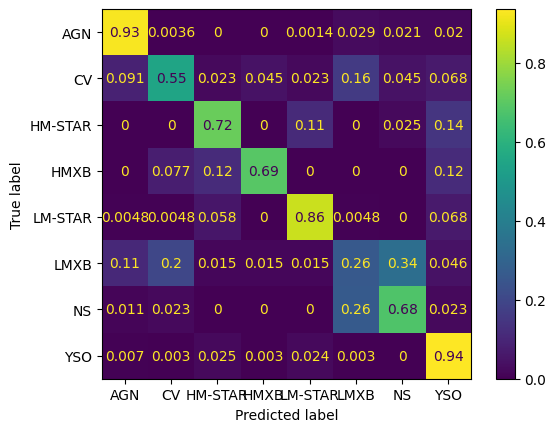

In [31]:
ConfusionMatrixDisplay.from_predictions(
    np.where(y_true==1)[1], 
    np.where(y_pred_hui==1)[1], 
    normalize='true', 
    display_labels=classes
)

In [9]:
df_inp = df_feat
df_inp['target'] = df['True_Class']
df_inp['target_pred_hui'] = df['Class']

In [10]:
df_inp.to_csv('df_inp.csv', index=False)

In [11]:
# df_inp.to_csv?